<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/Embedding_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tok działań:**
- budowa modelu z warstwą Embedding (nie uczymy modelu)
- analiza współczynników wagowych modelu dla korpusu 10 znakowego
- budowa i proces uczenia modelu klasyfikcyjnego (analiza wag warstwy embedding przed i po procesie uczenia)
- prezentacja współczynników wagowych wyuczonej warstwy Embedding na platformie Embedding Projector

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

**Budowanie warstwy Embedding dla słownika składającego się z 10 cyfr**

Bez procesu uczenia

In [3]:
# utworzenie prostego modelu z warstwą Embedding
model = Sequential()
embedding_layer = Embedding(input_dim=10,output_dim=4,input_length=2)
model.add(embedding_layer)
model.compile('adam','mse')

# input_dim - rozmiar słownika
# output_dim - długość wektora dla  każdego słowa
# input_length - maksymalna długość sekwencji

# W powyższym przykładzie ustawiamy 10 jako rozmiar słownictwa, ponieważ będziemy kodować liczby od 0 do 9.
# Chcemy, aby długość wektora słów wynosiła 4, stąd output_dim jest ustawione na 4.
# Długość sekwencji wejściowej do warstwy osadzania będzie wynosić 2 (będziemy podawać na wejściu sieci dwie cyfry)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 4)              40        
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# wydruk wspólczynników wagowych warstwy Embedding
# Poniewaćż nie inicjujemy procesu uczenia wartości wag są losowe

print(model.weights)

[<tf.Variable 'embedding/embeddings:0' shape=(10, 4) dtype=float32, numpy=
array([[-0.04065062,  0.02567525,  0.02369883, -0.02545043],
       [ 0.0125103 ,  0.03824475, -0.00220535,  0.01908772],
       [-0.01047853,  0.0128063 ,  0.02208764, -0.03534303],
       [-0.03864514,  0.00396743, -0.03262756, -0.00030172],
       [ 0.0456609 , -0.03369216, -0.0005679 , -0.03281411],
       [-0.0228444 , -0.04250279,  0.00198102, -0.02722756],
       [ 0.01264839, -0.04353664,  0.01681871, -0.03511165],
       [ 0.04199961,  0.04039571,  0.03804877, -0.00347849],
       [-0.01276988,  0.02494067, -0.00902639,  0.02631925],
       [ 0.02812321,  0.00451074,  0.04290397,  0.02852769]],
      dtype=float32)>]


Te wagi są reprezentacjami wektorowymi słów w słownictwie.
Tabela wag o rozmiarze 10 x 4, dla słów od 0 do 9.


In [6]:
# Teraz przekażmy przykładowe dane wejściowe do  modelu i zobaczmy wyniki.
input_data = np.array([[1,2]])
pred = model.predict(input_data)
print("-----------------------------------------------------------------")
print("Dane wejściowe modelu:", input_data.shape)

print("-----------------------------------------------------------------")
print("")
print("Wartości wag warstwy Embedding dla podanych na wejsciu danych:")
print(pred)

1/1 [==============================] - 0s 163ms/step
-----------------------------------------------------------------
Dane wejściowe modelu: (1, 2)
-----------------------------------------------------------------

Wartości wag warstwy Embedding dla podanych na wejsciu danych:
[[[ 0.0125103   0.03824475 -0.00220535  0.01908772]
  [-0.01047853  0.0128063   0.02208764 -0.03534303]]]


Jak widać, każde słowo (1 i 2) jest reprezentowane przez wektor o długości 4.

W tym przykładzie nie wytrenowaliśmy warstwy osadzania. Wagi przypisane do wektorów słów są inicjowane losowo.

------------------------------------------------------------------

**Klasyfikacja recenzji restauracji**


Tok działań:    
*   Tokenizacja zdań na słowa.
*   Utwórzenie zakodowanego wektor "one-hot" dla każdego słowa.
*   Użycie funkcji "Padding", w celu ujednolicenia rozmiaru sekekwencji wejściowej modelu (upewnienia się, że wszystkie sekwencje mają tę samą długość).
*   Przekazanie wypełnionych sekwencji jako danych wejściowych do warstwy Embedding.
*   Spłaszczennie danych do wktora i zastostosowanie  warstwę Dense, aby przewidywać etykietę

    
    

In [7]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

Aby to uprościć, użyjemy łącznie tylko  10 przykładowych, prostych  recenzji. Połowa z nich jest pozytywna, reprezentowana przez 0, a druga połowa jest negatywna, reprezentowana przez 1.

In [8]:
#definicja 10 recencji
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]

#definicja etykiet (1-negatywane, 0-pozytywna)
labels = array([1,1,1,1,1,0,0,0,0,0])

Przyjmiemy rozmiar słownictwa jako 50 i zakodujemy słowa za pomocą funkcji "one_hot" z Keras.

In [9]:
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

encoded reviews: [[24, 42, 7], [47, 30], [30, 49], [47, 32], [47, 32], [24], [24, 43], [2], [24, 8], [49, 42, 16, 27]]


Widać, że długość każdej zakodowanej recenzji jest równa liczbie słów w tej recenzji. Keras one_hot  konwertuje każde słowo na zakodowany indeks one-hot.

Teraz musimy zastosować "padding", aby wszystkie zakodowane recenzje miały tę samą długość.

Zdefiniujmy 4 jako maksymalną długość i wypełnijmy zakodowane wektory zerami na końcu.

In [10]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

#Wypełnione i zakodowane recenzje będą wyglądać następująco:

[[24 42  7  0]
 [47 30  0  0]
 [30 49  0  0]
 [47 32  0  0]
 [47 32  0  0]
 [24  0  0  0]
 [24 43  0  0]
 [ 2  0  0  0]
 [24  8  0  0]
 [49 42 16 27]]


Po utworzeniu ujednoliconej pod względem rozmiaru, zakodowanje  reprezentacji recenzji, jesteśmy gotowi do przekazania jej jako danych wejściowych do warstwy osadzania.

W poniższym fragmencie kodu tworzymy prosty model Keras.

Ustalimy arbitralnie długość osadzonych wektorów dla każdego słowa na 8, a długość wektora wejściowego będzie maksymalną długością, którą już zdefiniowaliśmy jako 4.

In [11]:
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length, name="wmi-embedding")

In [12]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 wmi-embedding (Embedding)   (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [14]:
# współczynniki wagowe przed procesem uczenia

weights = model.get_layer('wmi-embedding').get_weights()[0]
weights

array([[-0.04692316,  0.03691537,  0.01898643,  0.02760127, -0.0225871 ,
         0.02980559, -0.03139632, -0.04057325],
       [ 0.04780779,  0.01866927, -0.01517338,  0.0474566 , -0.04753056,
        -0.04874801,  0.01003518, -0.020298  ],
       [-0.02158872, -0.03731651,  0.03925413, -0.01456163,  0.0186323 ,
         0.01220224, -0.02295525,  0.02455831],
       [ 0.01949206, -0.02562584,  0.04789329,  0.02962397,  0.04451748,
        -0.04485197,  0.02345509,  0.03001783],
       [-0.03496599, -0.0405298 , -0.01518898,  0.0150204 , -0.01180304,
         0.02273586, -0.04610524,  0.02301871],
       [ 0.01405657, -0.00314373,  0.01091803, -0.00497147, -0.03666028,
         0.00109256,  0.01824944, -0.01573936],
       [ 0.00141234, -0.01665816,  0.04875544, -0.04627434,  0.04579525,
         0.01822212,  0.01562356, -0.04077601],
       [ 0.01496768, -0.02058599,  0.03677702, -0.01129104, -0.03348564,
        -0.03455776, -0.04875747, -0.02502893],
       [ 0.0264536 , -0.01773218

In [21]:
## Jeśli sprawdzimy osadzenie dla pierwszego słowa, otrzymamy następujący wektor.
em_before = embedding_layer.get_weights()[0][0]
em_before

array([-0.06196029,  0.05189197,  0.03404605,  0.01266391, -0.03766111,
        0.0149563 , -0.01642964, -0.05556491], dtype=float32)

**Proces uczenia zdefiniowanego modelu**

In [16]:
history = model.fit(padded_reviews,labels,epochs=15,verbose=1)

Epoch 1/15
1/1 [==============================] - 1s 773ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 0.6908 - accuracy: 0.6000
Epoch 3/15
1/1 [==============================] - 0s 11ms/step - loss: 0.6890 - accuracy: 0.6000
Epoch 4/15
1/1 [==============================] - 0s 13ms/step - loss: 0.6873 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 12ms/step - loss: 0.6856 - accuracy: 0.7000
Epoch 6/15
1/1 [==============================] - 0s 12ms/step - loss: 0.6839 - accuracy: 0.7000
Epoch 7/15
1/1 [==============================] - 0s 12ms/step - loss: 0.6822 - accuracy: 0.8000
Epoch 8/15
1/1 [==============================] - 0s 12ms/step - loss: 0.6805 - accuracy: 0.9000
Epoch 9/15
1/1 [==============================] - 0s 15ms/step - loss: 0.6788 - accuracy: 0.9000
Epoch 10/15
1/1 [==============================] - 0s 10ms/step - loss: 0.6771 - accuracy: 0.9000
Epoch 11/15
1/1 [===========

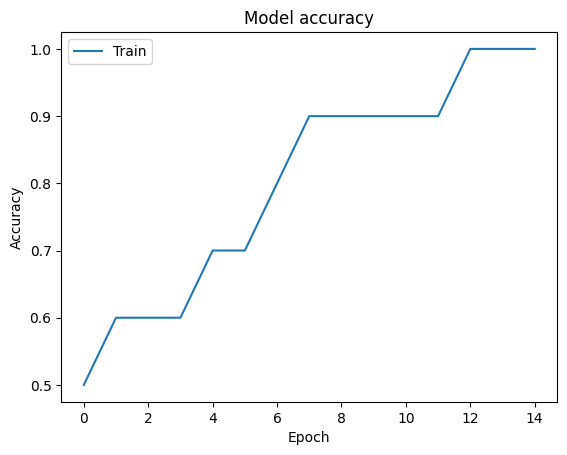

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Po zakończeniu treningu warstwa osadzania nauczyła się wag, które są niczym innym jak reprezentacjami wektorowymi każdego słowa. Sprawdźmy kształt macierzy wag.

In [18]:
# rozmiar słownika (korpusu) = 50
# ustalony arbitralnie rozmiar wektora embedding = 8

print(embedding_layer.get_weights()[0].shape)

(50, 8)


In [19]:
# Jeśli sprawdzimy osadzenie dla pierwszego słowa, otrzymamy następujący wektor.
em_after = embedding_layer.get_weights()[0][0]


In [20]:
em_after

array([-0.06196029,  0.05189197,  0.03404605,  0.01266391, -0.03766111,
        0.0149563 , -0.01642964, -0.05556491], dtype=float32)

In [ ]:
# współczynniki wagowe po procesie uczenia
weights = model.get_layer('wmi-embedding').get_weights()[0]
weights

array([[-0.03009913, -0.00630149,  0.0342323 ,  0.01805471,  0.06167956,
         0.00113893,  0.02289555, -0.02222595],
       [-0.01105039, -0.04499513, -0.03836181,  0.03077323, -0.03992243,
         0.0205842 ,  0.03690166,  0.01182785],
       [ 0.03931007,  0.0332411 , -0.02449536,  0.04234358, -0.02865002,
        -0.02046877, -0.04550374,  0.0124355 ],
       [ 0.03039586, -0.01549249, -0.06457781, -0.04556405,  0.05187008,
        -0.00945957,  0.01318602,  0.00998955],
       [-0.03129976, -0.04079033,  0.00189749, -0.00822543, -0.01110489,
         0.03223442, -0.03374512,  0.04087931],
       [ 0.00985133, -0.02279192, -0.01687478, -0.01793376, -0.04266423,
        -0.00629946,  0.00442138,  0.0423224 ],
       [ 0.05824323, -0.04865115, -0.06101409,  0.06110463, -0.03932475,
        -0.01994795, -0.00240081,  0.02697068],
       [-0.00622816,  0.04052174,  0.03413934, -0.00963069, -0.00119922,
        -0.01906306, -0.02322131, -0.02563559],
       [-0.03091912, -0.03826197

In [ ]:
em_before

array([-0.03778084, -0.02177254,  0.04917517,  0.0027841 ,  0.04664195,
        0.01617683,  0.03783524, -0.03718925], dtype=float32)

In [ ]:
em_after

array([-0.03009913, -0.00630149,  0.0342323 ,  0.01805471,  0.06167956,
        0.00113893,  0.02289555, -0.02222595], dtype=float32)

**Przygotowanie danych do prezentacji współczynników wagowych wyuczonej warstwy Embedding  na platformie Embedding Projector**

In [23]:
# definicja funkcji standaryzującej

import tensorflow as tf

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)

  return lowercase


In [24]:
from tensorflow.keras.layers import TextVectorization

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=Vocab_size,
    output_mode='int',
    output_sequence_length=max_length)



In [25]:
vectorize_layer.adapt(reviews)

In [26]:
vocab = vectorize_layer.get_vocabulary()


In [29]:
vocab

['',
 '[UNK]',
 'horrible',
 'awesome',
 'work',
 'waitress',
 'services!',
 'service',
 'rude',
 'rocks',
 'poor',
 'never',
 'have',
 'food!',
 'food',
 'done',
 "couldn't",
 'coming',
 'cold',
 'better',
 'back!']

In [31]:
import io
import os
out_v = io.open('/content/drive/MyDrive/dane/modele/vectors01.tsv', 'w', encoding='utf-8')
out_m = io.open('/content/drive/MyDrive/dane/modele/metadata01.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # pomijając 0, bo jest to wypełnienie.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [32]:
try:
  from google.colab import files
  files.download('/content/drive/MyDrive/dane/modele/vectors01.tsv')
  files.download('/content/drive/MyDrive/dane/modele/metadata01.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zapisać dane do katalogu: C:\_T

!!! analiza relacji do słowa : awesom

 http://projector.tensorflow.org/?_gl=1*rggcgk*_ga*NzAyNjA5OTg4LjE2OTQ1MDIxMDc.*_ga_W0YLR4190T*MTcwMDgyODU5Ny44LjEuMTcwMDgzMDA3MS4wLjAuMA..
